In [1]:
import pandas as pd

crime_data_raw = pd.read_csv('Normalized.csv', encoding='utf-8')
crime_data_raw.drop('Unnamed: 0', axis=1,inplace=True)
crime_data_raw.head()

,lng,lat,crime,barangay,city,modus,Temp (deg celsius),Feels Like (deg celsius),Wind (km/h),Cloud,...,day_Wednesday,Weather_Clear,Weather_Cloudy,Weather_Rainy,day_night_daylight,day_night_nighttime,placetype_rural,placetype_urban,crime_label,modus_label
0,125.808,7.44808,Vehicular Traffic Accident,Magugpo Poblacion,Tagum City,Not Indicated,30.0,32.0,15.0,57.0,...,0,1,0,0,1,0,0,1,8,28
1,125.803,7.44675,MURDER,Magugpo Poblacion,Tagum City,Stabbing/Hacking,23.0,25.0,8.0,18.0,...,0,0,1,0,0,1,0,1,3,42
2,125.803,7.44897,PHYSICAL INJURIES,Magugpo Poblacion,Tagum City,Stabbing/Hacking,23.0,25.0,8.0,18.0,...,0,0,1,0,0,1,0,1,4,42
3,125.818,7.45982,MURDER,Magugpo North,Tagum City,Shooting,27.0,29.0,13.0,1.0,...,0,0,1,0,0,1,0,1,3,39
4,125.818,7.46016,PHYSICAL INJURIES,Magugpo North,Tagum City,Shooting,27.0,29.0,13.0,1.0,...,0,0,1,0,0,1,0,1,4,39


In [2]:
#double Samal City carnapping
crime_data = crime_data_raw.append(crime_data_raw[crime_data_raw['crime'] == 'ANTI-CARNAPPING ACT (R.A. 6539) MC'][crime_data_raw['city'] == 'Samal City'],ignore_index=True)
crime_data = crime_data.append(crime_data_raw[crime_data_raw['crime'] == 'ANTI-CARNAPPING ACT (R.A. 6539) MC'][crime_data_raw['city'] == 'Samal City'],ignore_index=True)
crime_data.reset_index(inplace=True)
crime_data.drop(columns=['index'],axis=1,inplace=True)

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
crime_data.shape

(1118, 183)

In [4]:
crime_data['Children Population']= crime_data['Population,00-01']+crime_data['Population,01-04']+crime_data['Population,05-09']
crime_data['Teenage Population'] = crime_data['Population,10-14'] + crime_data['Population,15-19']
crime_data['Adult Population'] = crime_data['Population,20-24']+crime_data['Population,25-29']+crime_data['Population,30-34']+crime_data['Population,35-39']+crime_data['Population,40-44']+crime_data['Population,45-49']+crime_data['Population,50-54']+crime_data['Population,55-59']
crime_data['Retiree Population'] = crime_data['Population,60-64']+crime_data['Population,65-69']+crime_data['Population,70-74']+crime_data['Population,75-79']+crime_data['Population,80 years and over ']

crime_data['Female Children Population']= crime_data['Population,female,00-01']+crime_data['Population,female,01-04']+crime_data['Population,female,05-09']
crime_data['Female Teenage Population'] = crime_data['Population,female,10-14'] + crime_data['Population,female,15-19']
crime_data['Female Adult Population'] = crime_data['Population,female,20-24']+crime_data['Population,female,25-29']+crime_data['Population,female,30-34']+crime_data['Population,female,35-39']+crime_data['Population,female,40-44']+crime_data['Population,female,45-49']+crime_data['Population,female,50-54']+crime_data['Population,female,55-59']
crime_data['Female Retiree Population'] = crime_data['Population,female,60-64']+crime_data['Population,female,65-69']+crime_data['Population,female,70-74']+crime_data['Population,female,75-79']+crime_data['Population,female,80 years and over ']

crime_data['Male Children Population']= crime_data['Population,male,00-01']+crime_data['Population,male,01-04']+crime_data['Population,male,05-09']
crime_data['Male Teenage Population'] = crime_data['Population,male,10-14'] + crime_data['Population,male,15-19']
crime_data['Male Adult Population'] = crime_data['Population,male,20-24']+crime_data['Population,male,25-29']+crime_data['Population,male,30-34']+crime_data['Population,male,35-39']+crime_data['Population,male,40-44']+crime_data['Population,male,45-49']+crime_data['Population,male,50-54']+crime_data['Population,male,55-59']
crime_data['Male Retiree Population'] = crime_data['Population,male,60-64']+crime_data['Population,male,65-69']+crime_data['Population,male,70-74']+crime_data['Population,male,75-79']+crime_data['Population,male,80 years and over ']

In [5]:
exclude = [
    'lat','lng',
    'Housing,occupied housing,Commercial/industrial/agricultural,household',
    'Housing,occupied housing,Commercial/industrial/agricultural,population',
    'Housing,occupied housing,Duplex,household',
    'Housing,occupied housing,Duplex,population',
    'Housing,occupied housing,Multiunit residential,household',
    'Housing,occupied housing,Multiunit residential,population',
    'Housing,occupied housing,Single house,household',
    'Housing,occupied housing,Single house,population',
    'Household,total annual household expenditure',
    'Household,total annual household income',
    'Marital Status,Common law/livein',
    'Marital Status,Divorced/Separated',
    'Marital Status,Married',
    'Marital Status,Single',
    'Marital Status,Widowed',
    'Population',
    'Population,00-01',
    'Population,01-04',
    'Population,05-09',
    'Population,10-14',
    'Population,15-19',
    'Population,20-24',
    'Population,25-29',
    'Population,30-34',
    'Population,35-39',
    'Population,40-44',
    'Population,45-49',
    'Population,50-54',
    'Population,55-59',
    'Population,60-64',
    'Population,65-69',
    'Population,70-74',
    'Population,75-79',
    'Population,80 years and over ',
    'Population,male,00-01',
    'Population,male,01-04',
    'Population,male,05-09',
    'Population,male,10-14',
    'Population,male,15-19',
    'Population,male,20-24',
    'Population,male,25-29',
    'Population,male,30-34',
    'Population,male,35-39',
    'Population,male,40-44',
    'Population,male,45-49',
    'Population,male,50-54',
    'Population,male,55-59',
    'Population,male,60-64',
    'Population,male,65-69',
    'Population,male,70-74',
    'Population,male,75-79',
    'Population,male,80 years and over ',
    'Population,female,00-01',
    'Population,female,01-04',
    'Population,female,05-09',
    'Population,female,10-14',
    'Population,female,15-19',
    'Population,female,20-24',
    'Population,female,25-29',
    'Population,female,30-34',
    'Population,female,35-39',
    'Population,female,40-44',
    'Population,female,45-49',
    'Population,female,50-54',
    'Population,female,55-59',
    'Population,female,60-64',
    'Population,female,65-69',
    'Population,female,70-74',
    'Population,female,75-79',
    'Population,female,80 years and over ',
    'year',
    'month_num',
    'land area sq km',
    'modus','crime_label','modus_label'
]

In [6]:
crime_data.drop(columns=exclude, axis=1, inplace=True)
crime_data.shape

(1118, 117)

In [7]:
drop_VTA = []
for index,row in crime_data.iterrows():
    if crime_data.loc[index,'crime'] == 'Vehicular Traffic Accident':
        drop_VTA.append(index)
crime_data.drop(crime_data.index[drop_VTA],inplace=True)
crime_data.reset_index(inplace=True)
crime_data.drop(columns=['index'],axis=1,inplace=True)

In [8]:
for index,row in crime_data[crime_data['crime']=='HOMICIDE'].iterrows():
    crime_data.at[index,'crime'] = 'MURDER'
for index,row in crime_data[crime_data['crime']=='MURDER'].iterrows():
    crime_data.at[index,'crime'] = 'Murder/Homicide'
for index,row in crime_data[crime_data['crime']=='ANTI-CARNAPPING ACT (R.A. 6539) MC'].iterrows():
    crime_data.at[index,'crime'] = 'Carnapping (R.A. 6539)'
for index,row in crime_data[crime_data['crime']=='PHYSICAL INJURIES'].iterrows():
    crime_data.at[index,'crime'] = 'Physical Injuries'
for index,row in crime_data[crime_data['crime']=='RAPE (Art. 266-A RC & R.A.8353)'].iterrows():
    crime_data.at[index,'crime'] = 'Rape (Art. 266-A RC & R.A.8353)'
for index,row in crime_data[crime_data['crime']=='ROBBERY'].iterrows():
    crime_data.at[index,'crime'] = 'Robbery'
for index,row in crime_data[crime_data['crime']=='THEFT'].iterrows():
    crime_data.at[index,'crime'] = 'Theft'

In [9]:
crime_data.to_csv('hello.csv')

In [10]:
crime_d_copy = crime_data.copy()

In [11]:
crime_data['crime'] = crime_data['crime'].astype('category')
crime_data['crime_label'] = crime_data['crime'].cat.codes
crime_data.head()

,crime,barangay,city,Temp (deg celsius),Feels Like (deg celsius),Wind (km/h),Cloud,Humidity,Precip (mm),Pressure (mb),...,Retiree Population,Female Children Population,Female Teenage Population,Female Adult Population,Female Retiree Population,Male Children Population,Male Teenage Population,Male Adult Population,Male Retiree Population,crime_label
0,Murder/Homicide,Magugpo Poblacion,Tagum City,23.0,25.0,8.0,18.0,89.0,0.0,1013.0,...,232.0,320.5,315.0,863.0,124.5,341.5,318.5,874.5,107.0,2
1,Physical Injuries,Magugpo Poblacion,Tagum City,23.0,25.0,8.0,18.0,89.0,0.0,1013.0,...,232.0,320.5,315.0,863.0,124.5,341.5,318.5,874.5,107.0,3
2,Murder/Homicide,Magugpo North,Tagum City,27.0,29.0,13.0,1.0,66.0,0.0,1013.0,...,685.0,947.5,932.0,2550.0,369.0,1010.0,941.0,2581.5,317.5,2
3,Physical Injuries,Magugpo North,Tagum City,27.0,29.0,13.0,1.0,66.0,0.0,1013.0,...,685.0,947.5,932.0,2550.0,369.0,1010.0,941.0,2581.5,317.5,3
4,Drug Related Incident (RA 9165),New Visayas,Panabo City,39.0,51.0,9.0,9.0,52.0,0.0,1009.0,...,1201.5,1795.5,1651.0,4304.0,632.0,1882.0,1686.5,4502.5,569.5,1


In [12]:
for each in crime_data.columns:
    print("'{}',".format(each))

'crime',
'barangay',
'city',
'Temp (deg celsius)',
'Feels Like (deg celsius)',
'Wind (km/h)',
'Cloud',
'Humidity',
'Precip (mm)',
'Pressure (mb)',
'Bank',
'Bar',
'Beach',
'Bridge',
'Cemetery',
'Church',
'Clinic',
'Commercial Building',
'Community Center',
'Convenience Store',
'Fire Station',
'Gas Station',
'Government Office',
'Greenfield',
'Highway',
'Highway Pedestrian',
'Highway Primary',
'Highway Residential',
'Highway Secondary',
'Highway Tertiary',
'Hospital',
'Hotel',
'Industrial Building',
'Mall',
'Marketplace',
'Park',
'Parking Area',
'Pawnshop',
'Pharmacy',
'Police Station',
'Post Office',
'Private Office',
'Recreational Area',
'Residential Building',
'Restaurant',
'Road',
'School',
'Sports Center',
'Tourist Attraction',
'Transport Terminal',
'php-usd-rate',
'PSE-index-Close',
'Education,Baccalauate graduate',
'Education,College undergraduate',
'Education,Elementary',
'Education,High school',
'Education,No grade completed',
'Education,Out of school youth',
'Education,Post bac

In [13]:
independent_columns = []
exclude_cols = ['crime','barangay','city','modus','crime_label','year',
                'month_num','land area sq km']
for each in crime_data.columns:
    if each not in exclude_cols:
        independent_columns.append(each)
independent_columns
for each in independent_columns:
    print(each)

Temp (deg celsius)
Feels Like (deg celsius)
Wind (km/h)
Cloud
Humidity
Precip (mm)
Pressure (mb)
Bank
Bar
Beach
Bridge
Cemetery
Church
Clinic
Commercial Building
Community Center
Convenience Store
Fire Station
Gas Station
Government Office
Greenfield
Highway
Highway Pedestrian
Highway Primary
Highway Residential
Highway Secondary
Highway Tertiary
Hospital
Hotel
Industrial Building
Mall
Marketplace
Park
Parking Area
Pawnshop
Pharmacy
Police Station
Post Office
Private Office
Recreational Area
Residential Building
Restaurant
Road
School
Sports Center
Tourist Attraction
Transport Terminal
php-usd-rate
PSE-index-Close
Education,Baccalauate graduate
Education,College undergraduate
Education,Elementary
Education,High school
Education,No grade completed
Education,Out of school youth
Education,Post baccalaureate
Education,Postsecondary
Household,number of households
Housing,dwelling tenure status,Own house rent lot
Housing,dwelling tenure status,Own house rent,free lot with consent of owner
Ho

In [14]:
len(independent_columns)

114

In [15]:
weather_cols = [
'Temp (deg celsius)',
'Feels Like (deg celsius)',
'Wind (km/h)',
'Cloud',
'Humidity',
'Precip (mm)',
'Pressure (mb)',
'Weather_Clear',
'Weather_Cloudy',
'Weather_Rainy',
]
len(weather_cols)

10

In [16]:
places_cols = [
'Bank',
'Bar',
'Beach',
'Bridge',
'Cemetery',
'Church',
'Clinic',
'Commercial Building',
'Community Center',
'Convenience Store',
'Fire Station',
'Gas Station',
'Government Office',
'Greenfield',
'Highway',
'Highway Pedestrian',
'Highway Primary',
'Highway Residential',
'Highway Secondary',
'Highway Tertiary',
'Hospital',
'Hotel',
'Industrial Building',
'Mall',
'Marketplace',
'Park',
'Parking Area',
'Pawnshop',
'Pharmacy',
'Police Station',
'Post Office',
'Private Office',
'Recreational Area',
'Residential Building',
'Restaurant',
'Road',
'School',
'Sports Center',
'Tourist Attraction',
'Transport Terminal',
]
len(places_cols)

40

In [17]:
social_cols = [
'Education,Baccalauate graduate',
'Education,College undergraduate',
'Education,Elementary',
'Education,High school',
'Education,No grade completed',
'Education,Out of school youth',
'Education,Post baccalaureate',
'Education,Postsecondary',
'Household,number of households',
'Housing,dwelling tenure status,Own house rent lot',
'Housing,dwelling tenure status,Own house rent,free lot with consent of owner',
'Housing,dwelling tenure status,Own house rent,free lot without consent of owner',
'Housing,dwelling tenure status,Own or owner,like possession of house and lot',
'Housing,dwelling tenure status,Rent house/ room including lot',
'Housing,dwelling tenure status,Rent,free house and lot with consent of owner',
'Housing,dwelling tenure status,Rent,free house and lot without consent of owner',
'Labor,Employed',
'Labor,In the Labor Force',
'Labor,Not in the Labor Force',
'Labor,Underemployed',
'Labor,Unemployed',
'Poverty,poverty incidence by employed',
'Poverty,poverty incidence by household',
'Poverty,poverty incidence by population',
'Poverty,poverty incidence by unemployed',
'placetype_rural',
'placetype_urban',
'Children Population',
'Teenage Population',
'Adult Population',
'Retiree Population',
'Female Children Population',
'Female Teenage Population',
'Female Adult Population',
'Female Retiree Population',
'Male Children Population',
'Male Teenage Population',
'Male Adult Population',
'Male Retiree Population',
]
len(social_cols)

39

In [18]:
economic_cols = [
'php-usd-rate',
'PSE-index-Close',
'Consumer Price Index  - all items',
'Consumer Price Index -Alcoholic beverages and tobacco',
'Consumer Price Index -transport',
'Consumer Price Index -Housing, water, electricity, gas, and other fuels',
'Consumer Price Index -Restaurant and miscellaneous goods and services',
'inflation rate',
'savings deposit interest rate',
'bank lending rates',
]
len(economic_cols)

10

In [19]:
timeday_cols = [
'time_epoch_After Midnight',
'time_epoch_After Work-Hours',
'time_epoch_Afternoon',
'time_epoch_Early Morning',
'time_epoch_Evening',
'time_epoch_Morning',
'day_Friday',
'day_Monday',
'day_Saturday',
'day_Sunday',
'day_Thursday',
'day_Tuesday',
'day_Wednesday',
'day_night_daylight',
'day_night_nighttime',
]
len(timeday_cols)

15

In [20]:
crime_data.to_csv('data_for_doc.csv')
crime_data.shape

(1094, 118)

In [21]:
Tagum_Data = crime_data[crime_data['city'] == 'Tagum City']
Panabo_Data = crime_data[crime_data['city'] == 'Panabo City']
Samal_Data = crime_data[crime_data['city'] == 'Samal City']

In [22]:
Tagum_Data.to_csv('Tagum_Model.csv')
Panabo_Data.to_csv('Panabo_Model.csv')
Samal_Data.to_csv('Samal_Model.csv')

# MODEL TRAINING

In [23]:
crime_dict = dict(zip(crime_data['crime_label'].unique(), crime_data['crime'].unique()))
crime_dict

{2: 'Murder/Homicide',
 3: 'Physical Injuries',
 1: 'Drug Related Incident (RA 9165)',
 6: 'Theft',
 0: 'Carnapping (R.A. 6539)',
 4: 'Rape (Art. 266-A RC & R.A.8353)',
 5: 'Robbery'}

In [24]:
from sklearn.model_selection import train_test_split

def strat_data_split(model, stratify=True):
    if stratify == True:
        X_train, X_test, y_train, y_test = train_test_split(
            model[independent_columns], 
            model['crime_label'],
            random_state=42,
            shuffle=True,
            stratify=model['crime_label'])
    
        model_count = model['crime_label'].value_counts()
        train_count = y_train.value_counts()
        test_count = y_test.value_counts()
        
        print("{}, {}, {}, {}".format('crime','total','train','test'))
    else:
        model_count = Tagum_Data['crime_label'].value_counts()
        train_count = Panabo_Data['crime_label'].value_counts()
        test_count = Samal_Data['crime_label'].value_counts()
    
        print("{}, {}, {}, {}".format('crime','tagum','panabo','samal'))
    
    counter = 0
    while counter < 7:
        print("{}, {}, {}, {}".format(crime_dict[counter],model_count[counter],train_count[counter],test_count[counter]))
        counter += 1
    
    if stratify == True:
        print("{}, {}".format('X Train', X_train.shape))
        print("{}, {}".format('X Test', X_test.shape))
        print("{}, {}".format('y Train', y_train.shape))
        print("{}, {}".format('y Test', y_test.shape))
        return X_train, X_test, y_train, y_test
    else:
        print("{}, {}".format('Tagum', Tagum_Data.shape))
        print("{}, {}".format('Panabo', Panabo_Data.shape))
        print("{}, {}".format('Samal', Samal_Data.shape))
    return

In [25]:
from sklearn.ensemble import RandomForestClassifier
def train_rfc_model(estimators, train_x, train_y):
    rfc = RandomForestClassifier(
        n_estimators=estimators,
        random_state=42
    )
    rfc.fit(train_x, train_y)
    return rfc

In [26]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,confusion_matrix
import numpy as np

def evaluate_model(model, test_x, test_y):
    x=0
    print("{}, {}, {}, {}, {}, {}, {}".format('Estimators', 'Precision', 'F1', 'Recall', 'Accuracy', 'mean', 'std'))
    while x < 10:
        eval_score = model[x].predict(test_x)

        accuracy = accuracy_score(test_y, eval_score)
        precision_ave = precision_score(test_y, eval_score, average='weighted')
        recall_ave = recall_score(test_y, eval_score, average='weighted')
        f1_ave = f1_score(test_y, eval_score, average='weighted')

        mean = np.median([accuracy*100, precision_ave*100, recall_ave*100, f1_ave*100])
        std = np.std([accuracy*100, precision_ave*100, recall_ave*100, f1_ave*100])

        print("{}, {:0.1f}, {:0.1f}, {:0.1f}, {:0.1f}, {:0.1f}, {:0.3f}".format(model[x].get_params()['n_estimators'], precision_ave*100, f1_ave*100, recall_ave*100, accuracy*100, mean, std))
        x+=1

In [27]:
def get_important_features(model):
    importances = model.feature_importances_
    x=0
    for each in importances:
        print("{}$ {:0.2f}".format(independent_columns[x],each*100))
        x+=1

In [28]:
def convert_to_PKL(model, name):
    from sklearn.externals import joblib
    joblib.dump(model, name)

In [29]:
def visualize_numerical_data(x, y, x_label, data):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(figsize=(9, 6))
    sns.set(style="ticks", color_codes=True)
    sns.catplot(x=x, y=y, kind="violin", palette="Blues",inner=None,data=data, ax=ax)
    ax1 = sns.swarmplot(x=x, y=y, hue="city", palette="YlOrRd",size=3.5, data=data, ax=ax)
    ax1.set(xlabel=x_label, ylabel=None)
    return ax1

# visualize important variables

In [30]:
for index,row in crime_d_copy[crime_d_copy['crime']=='Carnapping (R.A. 6539)'].iterrows():
    crime_d_copy.at[index,'crime'] = 'Carnapping'
for index,row in crime_d_copy[crime_d_copy['crime']=='Rape (Art. 266-A RC & R.A.8353)'].iterrows():
    crime_d_copy.at[index,'crime'] = 'Rape'
for index,row in crime_d_copy[crime_d_copy['crime']=='Drug Related Incident (RA 9165)'].iterrows():
    crime_d_copy.at[index,'crime'] = 'Drug Related Incident'

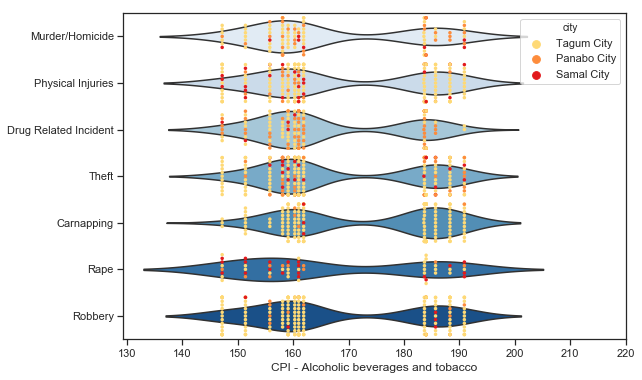

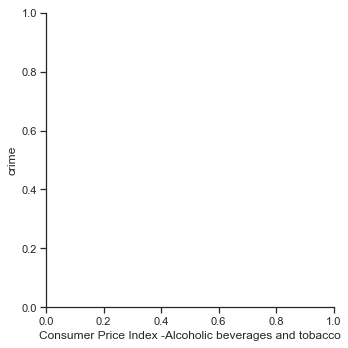

In [77]:
ax_ = visualize_numerical_data('Consumer Price Index -Alcoholic beverages and tobacco', 'crime', 'CPI - Alcoholic beverages and tobacco', crime_d_copy)
ax_.xaxis.set_ticks(np.arange(130, 230, 10))

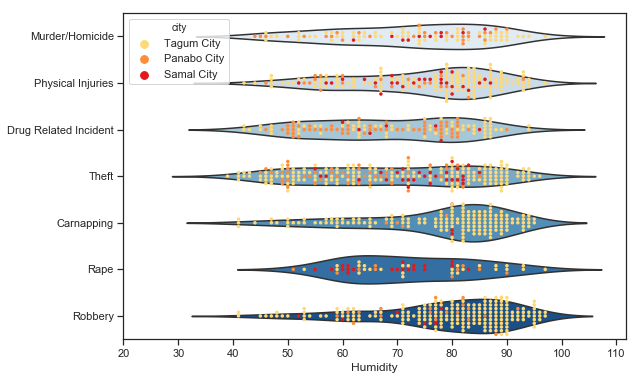

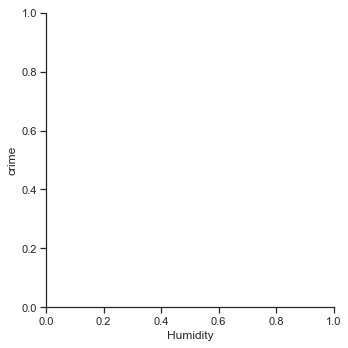

In [32]:
ax_ = visualize_numerical_data('Humidity', 'crime', 'Humidity', crime_d_copy)
ax_.xaxis.set_ticks(np.arange(20, 120, 10))

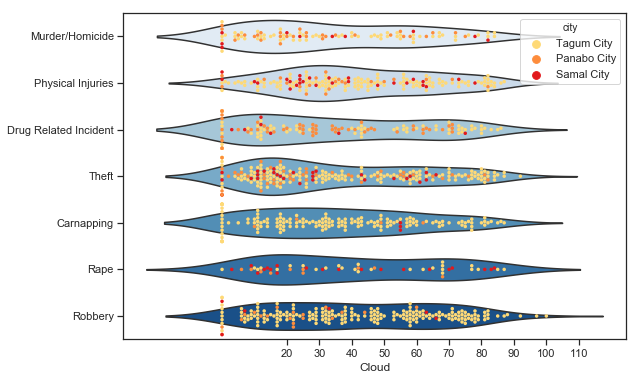

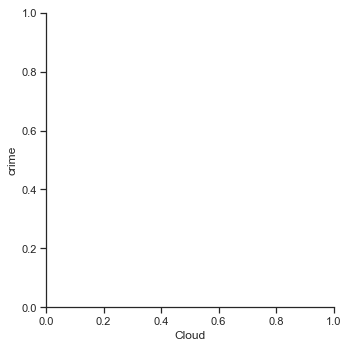

In [33]:
ax_ = visualize_numerical_data('Cloud', 'crime', 'Cloud', crime_d_copy)
ax_.xaxis.set_ticks(np.arange(20, 120, 10))

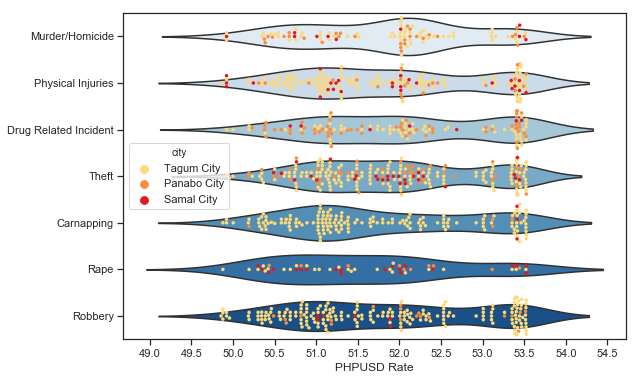

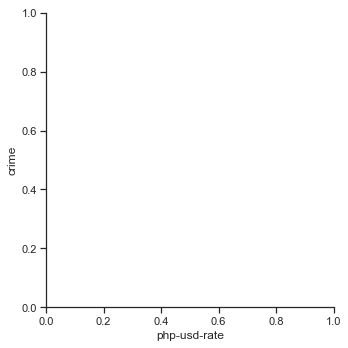

In [34]:
ax_ = visualize_numerical_data('php-usd-rate', 'crime', 'PHPUSD Rate', crime_d_copy)
ax_.xaxis.set_ticks(np.arange(49, 55, 0.5))

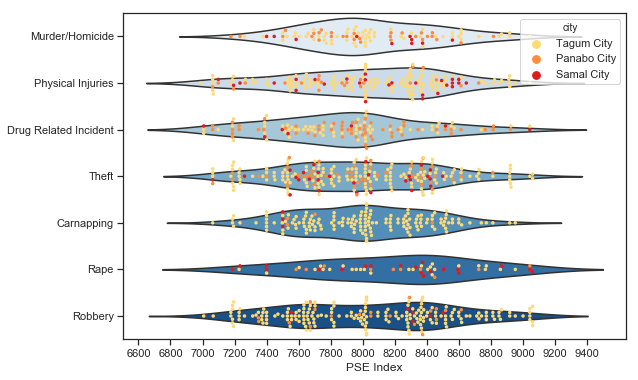

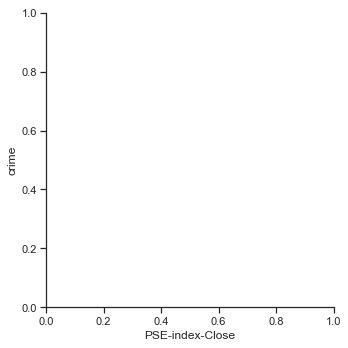

In [35]:
ax_ = visualize_numerical_data('PSE-index-Close', 'crime', 'PSE Index', crime_d_copy)
ax_.xaxis.set_ticks(np.arange(6600, 9600, 200))

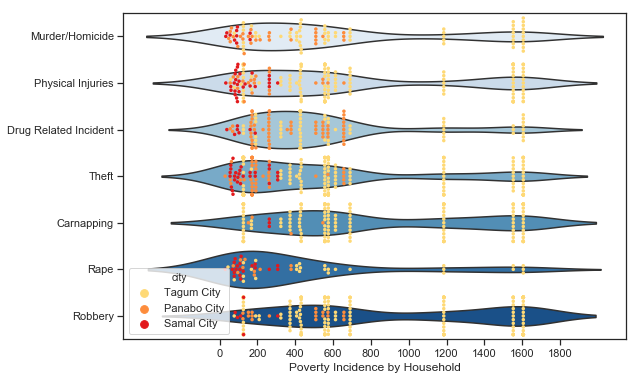

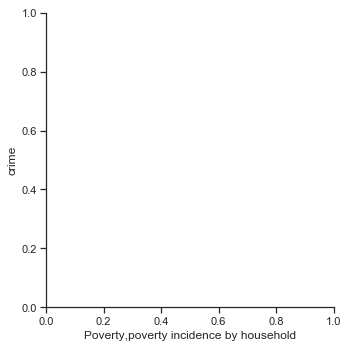

In [36]:
ax_ = visualize_numerical_data('Poverty,poverty incidence by household', 'crime', 'Poverty Incidence by Household', crime_d_copy)
ax_.xaxis.set_ticks(np.arange(0, 2000, 200))

In [37]:
impo_bi = crime_d_copy[["crime","city","Highway","Residential Building",'day_night_nighttime','time_epoch_Early Morning']]
impo_bi.head()

,crime,city,Highway,Residential Building,day_night_nighttime,time_epoch_Early Morning
0,Murder/Homicide,Tagum City,0,0,1,0
1,Physical Injuries,Tagum City,1,0,1,0
2,Murder/Homicide,Tagum City,1,0,1,0
3,Physical Injuries,Tagum City,1,0,1,0
4,Drug Related Incident,Panabo City,1,1,0,0


In [38]:
city_f = 'Samal City'
crime_f = 'Theft'

print("{}\n{}\n{}\n{}".format(
impo_bi[impo_bi['crime']==crime_f][impo_bi['city']==city_f]['Highway'].value_counts(),
impo_bi[impo_bi['crime']==crime_f][impo_bi['city']==city_f]['Residential Building'].value_counts(),
impo_bi[impo_bi['crime']==crime_f][impo_bi['city']==city_f]['time_epoch_Early Morning'].value_counts(),
impo_bi[impo_bi['crime']==crime_f][impo_bi['city']==city_f]['day_night_nighttime'].value_counts()
))

/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


0    15
1    13
Name: Highway, dtype: int64
0    24
1     4
Name: Residential Building, dtype: int64
0    18
1    10
Name: time_epoch_Early Morning, dtype: int64
1    15
0    13
Name: day_night_nighttime, dtype: int64


/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# Tagum

In [39]:
Tagum_Data.corr(method='pearson').to_csv('corr_tagum.csv')
Tagum_Data[weather_cols].corr(method='pearson').to_csv('corr_tagum_weather.csv')
Tagum_Data[places_cols].corr(method='pearson').to_csv('corr_tagum_places.csv')
Tagum_Data[economic_cols].corr(method='pearson').to_csv('corr_tagum_economic.csv')
Tagum_Data[timeday_cols].corr(method='pearson').to_csv('corr_tagum_timeday.csv')
Tagum_Data[social_cols].corr(method='pearson').to_csv('corr_tagum_social.csv')

In [40]:
tagum_importance = [
'Feels Like (deg celsius)',
'Wind (km/h)',
'Cloud',
'Humidity',
'Highway Pedestrian',
'Highway Residential',
'Highway Tertiary',
'Residential Building',
'php-usd-rate',
'PSE-index-Close',
'Education,No grade completed',
'Poverty,poverty incidence by household',
'Poverty,poverty incidence by population',
'Consumer Price Index -Alcoholic beverages and tobacco',
'savings deposit interest rate',
'time_epoch_After Midnight',
'day_Tuesday',
'day_night_daylight',
'day_night_nighttime',
'Male Children Population',
]
len(tagum_importance)
Tagum_Data[tagum_importance].corr(method='pearson').to_csv('corr_tagum_imp.csv')

In [41]:
tagum_importance2 = [
'Highway Tertiary',
'Consumer Price Index -Restaurant and miscellaneous goods and services',
'Consumer Price Index -transport',
'bank lending rates',
'Consumer Price Index -Housing, water, electricity, gas, and other fuels',
'inflation rate',
'Consumer Price Index  - all items',
'savings deposit interest rate',
'Consumer Price Index -Alcoholic beverages and tobacco',
'Pressure (mb)',
'Precip (mm)',
'Temp (deg celsius)',
'Wind (km/h)',
'PSE-index-Close',
'Feels Like (deg celsius)',
'php-usd-rate',
'Cloud',
'Humidity',
]
len(tagum_importance2)
Tagum_Data[tagum_importance2].corr(method='pearson').to_csv('corr_tagum_imp_2.csv')

In [42]:
X_train, X_test, y_train, y_test = strat_data_split(Tagum_Data)

crime, total, train, test
Carnapping (R.A. 6539), 157, 118, 39
Drug Related Incident (RA 9165), 66, 50, 16
Murder/Homicide, 63, 47, 16
Physical Injuries, 131, 98, 33
Rape (Art. 266-A RC & R.A.8353), 27, 20, 7
Robbery, 193, 145, 48
Theft, 166, 124, 42
X Train, (602, 114)
X Test, (201, 114)
y Train, (602,)
y Test, (201,)


In [43]:
Tagum_Model_Train_10 = train_rfc_model(10, X_train, y_train)
Tagum_Model_Train_20 = train_rfc_model(20, X_train, y_train)
Tagum_Model_Train_30 = train_rfc_model(30, X_train, y_train)
Tagum_Model_Train_40 = train_rfc_model(40, X_train, y_train)
Tagum_Model_Train_50 = train_rfc_model(50, X_train, y_train)
Tagum_Model_Train_60 = train_rfc_model(60, X_train, y_train)
Tagum_Model_Train_70 = train_rfc_model(70, X_train, y_train)
Tagum_Model_Train_80 = train_rfc_model(80, X_train, y_train)
Tagum_Model_Train_90 = train_rfc_model(90, X_train, y_train)
Tagum_Model_Train_100 = train_rfc_model(100, X_train, y_train)

Tagum_Model_Train = [
    Tagum_Model_Train_10,
    Tagum_Model_Train_20,
    Tagum_Model_Train_30,
    Tagum_Model_Train_40,
    Tagum_Model_Train_50,
    Tagum_Model_Train_60,
    Tagum_Model_Train_70,
    Tagum_Model_Train_80,
    Tagum_Model_Train_90,
    Tagum_Model_Train_100
]

evaluate_model(Tagum_Model_Train, X_test, y_test)

Estimators, Precision, F1, Recall, Accuracy, mean, std
10, 29.8, 29.1, 29.4, 29.4, 29.4, 0.260
20, 30.9, 29.6, 29.9, 29.9, 29.9, 0.516
30, 29.7, 28.3, 28.9, 28.9, 28.9, 0.489
40, 31.2, 29.9, 30.3, 30.3, 30.3, 0.474
50, 30.7, 29.7, 30.3, 30.3, 30.3, 0.364
60, 28.3, 28.7, 29.9, 29.9, 29.3, 0.677
70, 28.1, 28.0, 28.9, 28.9, 28.5, 0.412


/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

80, 29.7, 29.9, 30.8, 30.8, 30.3, 0.536
90, 29.3, 29.0, 29.9, 29.9, 29.6, 0.361
100, 28.1, 27.8, 28.9, 28.9, 28.5, 0.485


/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

In [44]:
get_important_features(Tagum_Model_Train_40)

Temp (deg celsius)$ 3.18
Feels Like (deg celsius)$ 3.74
Wind (km/h)$ 3.23
Cloud$ 4.23
Humidity$ 4.80
Precip (mm)$ 2.72
Pressure (mb)$ 2.54
Bank$ 0.57
Bar$ 0.29
Beach$ 0.00
Bridge$ 0.00
Cemetery$ 0.12
Church$ 0.64
Clinic$ 0.10
Commercial Building$ 0.75
Community Center$ 0.58
Convenience Store$ 0.29
Fire Station$ 0.02
Gas Station$ 0.46
Government Office$ 0.34
Greenfield$ 0.48
Highway$ 0.72
Highway Pedestrian$ 0.98
Highway Primary$ 0.51
Highway Residential$ 0.97
Highway Secondary$ 0.88
Highway Tertiary$ 1.03
Hospital$ 0.57
Hotel$ 0.71
Industrial Building$ 0.01
Mall$ 0.44
Marketplace$ 0.38
Park$ 0.34
Parking Area$ 0.34
Pawnshop$ 0.03
Pharmacy$ 0.13
Police Station$ 0.46
Post Office$ 0.22
Private Office$ 0.18
Recreational Area$ 0.18
Residential Building$ 0.97
Restaurant$ 0.53
Road$ 0.04
School$ 0.69
Sports Center$ 0.35
Tourist Attraction$ 0.19
Transport Terminal$ 0.26
php-usd-rate$ 4.18
PSE-index-Close$ 3.68
Education,Baccalauate graduate$ 0.60
Education,College undergraduate$ 0.59
Education

In [45]:
Tagum_Model_Train_40

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
# convert_to_PKL(Tagum_Model_Train_40, 'randomforest_dangerpredict_model_tagum.pkl')

# Panabo

In [47]:
Panabo_Data.corr(method='pearson').to_csv('corr_panabo.csv')
Panabo_Data[weather_cols].corr(method='pearson').to_csv('corr_panabo_weather.csv')
Panabo_Data[places_cols].corr(method='pearson').to_csv('corr_panabo_places.csv')
Panabo_Data[economic_cols].corr(method='pearson').to_csv('corr_panabo_economic.csv')
Panabo_Data[timeday_cols].corr(method='pearson').to_csv('corr_panabo_timeday.csv')
Panabo_Data[social_cols].corr(method='pearson').to_csv('corr_panabo_social.csv')

In [48]:
panabo_importance = [
'Temp (deg celsius)',
'Feels Like (deg celsius)',
'Cloud',
'Humidity',
'Gas Station',
'Highway',
'Highway Primary',
'Residential Building',
'php-usd-rate',
'Education,Postsecondary',
'Labor,Not in the Labor Force',
'Poverty,poverty incidence by household',
'Consumer Price Index  - all items',
'Consumer Price Index -Alcoholic beverages and tobacco',
'Consumer Price Index -transport',
'time_epoch_Early Morning',
'time_epoch_Evening',
'day_Thursday',
'day_night_nighttime',
'Adult Population',
]
len(panabo_importance)
Panabo_Data[panabo_importance].corr(method='pearson').to_csv('corr_panabo_imp.csv')

In [49]:
panabo_importance2 = [
# 'Education,Out of school youth',
# 'Gas Station',
# 'Highway Primary',
# 'Poverty,poverty incidence by unemployed',
# 'Housing,dwelling tenure status,Own house rent lot',
# 'Labor,Employed',
# 'Retiree Population',
# 'Housing,dwelling tenure status,Rent,free house and lot with consent of owner',
# 'Labor,Unemployed',
# 'day_Thursday',
# 'Education,College undergraduate',
# 'Highway',
# 'Labor,In the Labor Force',
# 'Adult Population',
# 'Education,Postsecondary',
'Precip (mm)',
'Residential Building',
'Labor,Not in the Labor Force',
'Poverty,poverty incidence by household',
'Pressure (mb)',
'Consumer Price Index -Restaurant and miscellaneous goods and services',
'inflation rate',
'PSE-index-Close',
'bank lending rates',
'savings deposit interest rate',
'Wind (km/h)',
'Consumer Price Index -Housing, water, electricity, gas, and other fuels',
'Consumer Price Index -transport',
'Consumer Price Index  - all items',
'Consumer Price Index -Alcoholic beverages and tobacco',
'Temp (deg celsius)',
'Cloud',
'Feels Like (deg celsius)',
'php-usd-rate',
'Humidity',
]
len(panabo_importance2)
Panabo_Data[panabo_importance2].corr(method='pearson').to_csv('corr_panabo_imp_2.csv')

In [50]:
X_train, X_test, y_train, y_test = strat_data_split(Panabo_Data)

crime, total, train, test
Carnapping (R.A. 6539), 4, 3, 1
Drug Related Incident (RA 9165), 60, 45, 15
Murder/Homicide, 30, 22, 8
Physical Injuries, 22, 16, 6
Rape (Art. 266-A RC & R.A.8353), 10, 8, 2
Robbery, 19, 14, 5
Theft, 45, 34, 11
X Train, (142, 114)
X Test, (48, 114)
y Train, (142,)
y Test, (48,)


In [51]:
Panabo_Model_Train_10 = train_rfc_model(10, X_train, y_train)
Panabo_Model_Train_20 = train_rfc_model(20, X_train, y_train)
Panabo_Model_Train_30 = train_rfc_model(30, X_train, y_train)
Panabo_Model_Train_40 = train_rfc_model(40, X_train, y_train)
Panabo_Model_Train_50 = train_rfc_model(50, X_train, y_train)
Panabo_Model_Train_60 = train_rfc_model(60, X_train, y_train)
Panabo_Model_Train_70 = train_rfc_model(70, X_train, y_train)
Panabo_Model_Train_80 = train_rfc_model(80, X_train, y_train)
Panabo_Model_Train_90 = train_rfc_model(90, X_train, y_train)
Panabo_Model_Train_100 = train_rfc_model(100, X_train, y_train)

Panabo_Model_Train = [
    Panabo_Model_Train_10,
    Panabo_Model_Train_20,
    Panabo_Model_Train_30,
    Panabo_Model_Train_40,
    Panabo_Model_Train_50,
    Panabo_Model_Train_60,
    Panabo_Model_Train_70,
    Panabo_Model_Train_80,
    Panabo_Model_Train_90,
    Panabo_Model_Train_100
]

evaluate_model(Panabo_Model_Train, X_test, y_test)

Estimators, Precision, F1, Recall, Accuracy, mean, std
10, 21.6, 23.9, 27.1, 27.1, 25.5, 2.300
20, 26.6, 26.9, 29.2, 29.2, 28.0, 1.235
30, 26.4, 27.5, 31.2, 31.2, 29.4, 2.168
40, 26.4, 27.5, 31.2, 31.2, 29.4, 2.168
50, 26.0, 27.2, 31.2, 31.2, 29.2, 2.375
60, 25.3, 26.8, 31.2, 31.2, 29.0, 2.643
70, 25.2, 26.7, 31.2, 31.2, 29.0, 2.723
80, 22.8, 25.0, 29.2, 29.2, 27.1, 2.756
90, 25.3, 26.6, 31.2, 31.2, 28.9, 2.688
100, 22.5, 24.2, 27.1, 27.1, 25.7, 1.951


/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

In [52]:
get_important_features(Panabo_Model_Train_30)

Temp (deg celsius)$ 2.71
Feels Like (deg celsius)$ 3.08
Wind (km/h)$ 2.32
Cloud$ 2.85
Humidity$ 3.58
Precip (mm)$ 1.33
Pressure (mb)$ 1.81
Bank$ 0.66
Bar$ 0.33
Beach$ 0.09
Bridge$ 0.08
Cemetery$ 0.00
Church$ 0.15
Clinic$ 0.28
Commercial Building$ 0.43
Community Center$ 0.46
Convenience Store$ 0.41
Fire Station$ 0.10
Gas Station$ 1.10
Government Office$ 0.25
Greenfield$ 0.69
Highway$ 1.27
Highway Pedestrian$ 0.57
Highway Primary$ 1.10
Highway Residential$ 0.30
Highway Secondary$ 0.46
Highway Tertiary$ 0.58
Hospital$ 0.61
Hotel$ 0.46
Industrial Building$ 0.08
Mall$ 0.24
Marketplace$ 0.21
Park$ 0.26
Parking Area$ 0.00
Pawnshop$ 0.32
Pharmacy$ 0.14
Police Station$ 0.19
Post Office$ 0.11
Private Office$ 0.10
Recreational Area$ 0.08
Residential Building$ 1.38
Restaurant$ 0.94
Road$ 0.56
School$ 0.78
Sports Center$ 0.24
Tourist Attraction$ 0.00
Transport Terminal$ 0.20
php-usd-rate$ 3.35
PSE-index-Close$ 2.28
Education,Baccalauate graduate$ 0.57
Education,College undergraduate$ 1.23
Education

In [53]:
Panabo_Model_Train_30

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
# convert_to_PKL(Panabo_Model_Train_30, 'randomforest_dangerpredict_model_panabo.pkl')

# Samal

In [55]:
Samal_Data.corr(method='pearson').to_csv('corr_samal.csv')
Samal_Data[weather_cols].corr(method='pearson').to_csv('corr_samal_weather.csv')
Samal_Data[places_cols].corr(method='pearson').to_csv('corr_samal_places.csv')
Samal_Data[economic_cols].corr(method='pearson').to_csv('corr_samal_economic.csv')
Samal_Data[timeday_cols].corr(method='pearson').to_csv('corr_samal_timeday.csv')
Samal_Data[social_cols].corr(method='pearson').to_csv('corr_samal_social.csv')

In [56]:
samal_importance = [
'Temp (deg celsius)',
'Wind (km/h)',
'Cloud',
'Humidity',
'Commercial Building',
'Highway',
'Highway Pedestrian',
'Highway Tertiary',
'php-usd-rate',
'PSE-index-Close',
'Education,College undergraduate',
'Education,Postsecondary',
'Labor,Underemployed',
'Labor,Unemployed',
'Consumer Price Index -Alcoholic beverages and tobacco',
'savings deposit interest rate',
'time_epoch_After Work-Hours',
'time_epoch_Early Morning',
'day_Saturday',
'day_night_nighttime',
]
len(samal_importance)
Samal_Data[samal_importance].corr(method='pearson').to_csv('corr_samal_imp.csv')

In [57]:
samal_importance2 = [
# 'Female Adult Population',
# 'Highway Tertiary',
# 'Female Children Population',
# 'Children Population',
# 'Education,No grade completed',
# 'day_Saturday',
# 'time_epoch_After Work-Hours',
# 'day_night_nighttime',
# 'Housing,dwelling tenure status,Rent house/ room including lot',
# 'Labor,Employed',
# 'Adult Population',
# 'Poverty,poverty incidence by population',
# 'Education,Elementary',
# 'Labor,Underemployed',
# 'Labor,Unemployed',
'Education,Postsecondary',
'Consumer Price Index -Restaurant and miscellaneous goods and services',
'Precip (mm)',
'Education,College undergraduate',
'Consumer Price Index -Housing, water, electricity, gas, and other fuels',
'Pressure (mb)',
'time_epoch_Early Morning',
'Consumer Price Index  - all items',
'bank lending rates',
'inflation rate',
'Consumer Price Index -transport',
'savings deposit interest rate',
'Feels Like (deg celsius)',
'Temp (deg celsius)',
'Consumer Price Index -Alcoholic beverages and tobacco',
'Wind (km/h)',
'php-usd-rate',
'PSE-index-Close',
'Cloud',
'Humidity',
]
len(samal_importance2)
Samal_Data[samal_importance2].corr(method='pearson').to_csv('corr_samal_imp_2.csv')

In [58]:
X_train, X_test, y_train, y_test = strat_data_split(Samal_Data)

crime, total, train, test
Carnapping (R.A. 6539), 3, 2, 1
Drug Related Incident (RA 9165), 7, 5, 2
Murder/Homicide, 10, 7, 3
Physical Injuries, 27, 20, 7
Rape (Art. 266-A RC & R.A.8353), 20, 15, 5
Robbery, 6, 5, 1
Theft, 28, 21, 7
X Train, (75, 114)
X Test, (26, 114)
y Train, (75,)
y Test, (26,)


In [59]:
Samal_Model_Train_10 = train_rfc_model(10, X_train, y_train)
Samal_Model_Train_20 = train_rfc_model(20, X_train, y_train)
Samal_Model_Train_30 = train_rfc_model(30, X_train, y_train)
Samal_Model_Train_40 = train_rfc_model(40, X_train, y_train)
Samal_Model_Train_50 = train_rfc_model(50, X_train, y_train)
Samal_Model_Train_60 = train_rfc_model(60, X_train, y_train)
Samal_Model_Train_70 = train_rfc_model(70, X_train, y_train)
Samal_Model_Train_80 = train_rfc_model(80, X_train, y_train)
Samal_Model_Train_90 = train_rfc_model(90, X_train, y_train)
Samal_Model_Train_100 = train_rfc_model(100, X_train, y_train)

Samal_Model_Train = [
    Samal_Model_Train_10,
    Samal_Model_Train_20,
    Samal_Model_Train_30,
    Samal_Model_Train_40,
    Samal_Model_Train_50,
    Samal_Model_Train_60,
    Samal_Model_Train_70,
    Samal_Model_Train_80,
    Samal_Model_Train_90,
    Samal_Model_Train_100
]

evaluate_model(Samal_Model_Train, X_test, y_test)

Estimators, Precision, F1, Recall, Accuracy, mean, std
10, 13.1, 15.4, 19.2, 19.2, 17.3, 2.618
20, 24.2, 24.4, 26.9, 26.9, 25.6, 1.315
30, 19.9, 20.8, 23.1, 23.1, 21.9, 1.415
40, 19.5, 20.8, 23.1, 23.1, 21.9, 1.525
50, 23.1, 24.3, 26.9, 26.9, 25.6, 1.672
60, 26.5, 27.9, 30.8, 30.8, 29.4, 1.861
70, 26.5, 27.9, 30.8, 30.8, 29.4, 1.861
80, 27.4, 28.0, 30.8, 30.8, 29.4, 1.538
90, 32.1, 31.9, 34.6, 34.6, 33.4, 1.296
100, 32.5, 31.8, 34.6, 34.6, 33.6, 1.246


/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/angelalmuenda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

In [60]:
get_important_features(Samal_Model_Train_100)

Temp (deg celsius)$ 2.62
Feels Like (deg celsius)$ 2.46
Wind (km/h)$ 3.09
Cloud$ 3.84
Humidity$ 3.86
Precip (mm)$ 1.44
Pressure (mb)$ 1.73
Bank$ 0.00
Bar$ 0.00
Beach$ 0.59
Bridge$ 0.00
Cemetery$ 0.27
Church$ 0.64
Clinic$ 0.14
Commercial Building$ 0.82
Community Center$ 0.07
Convenience Store$ 0.27
Fire Station$ 0.11
Gas Station$ 0.14
Government Office$ 0.31
Greenfield$ 0.31
Highway$ 0.80
Highway Pedestrian$ 0.91
Highway Primary$ 0.00
Highway Residential$ 0.59
Highway Secondary$ 0.47
Highway Tertiary$ 1.03
Hospital$ 0.00
Hotel$ 0.00
Industrial Building$ 0.00
Mall$ 0.00
Marketplace$ 0.05
Park$ 0.19
Parking Area$ 0.00
Pawnshop$ 0.00
Pharmacy$ 0.18
Police Station$ 0.00
Post Office$ 0.00
Private Office$ 0.04
Recreational Area$ 0.00
Residential Building$ 0.39
Restaurant$ 0.27
Road$ 0.07
School$ 0.44
Sports Center$ 0.24
Tourist Attraction$ 0.00
Transport Terminal$ 0.11
php-usd-rate$ 3.48
PSE-index-Close$ 3.58
Education,Baccalauate graduate$ 0.79
Education,College undergraduate$ 1.46
Education

In [61]:
Samal_Model_Train_100

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
# convert_to_PKL(Samal_Model_Train_100, 'randomforest_dangerpredict_model_samal.pkl')

# Original Model

In [63]:
strat_data_split(None, stratify=False)

crime, tagum, panabo, samal
Carnapping (R.A. 6539), 157, 4, 3
Drug Related Incident (RA 9165), 66, 60, 7
Murder/Homicide, 63, 30, 10
Physical Injuries, 131, 22, 27
Rape (Art. 266-A RC & R.A.8353), 27, 10, 20
Robbery, 193, 19, 6
Theft, 166, 45, 28
Tagum, (803, 118)
Panabo, (190, 118)
Samal, (101, 118)


In [64]:
Original_Model_Train_10 = train_rfc_model(10, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_20 = train_rfc_model(20, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_30 = train_rfc_model(30, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_40 = train_rfc_model(40, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_50 = train_rfc_model(50, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_60 = train_rfc_model(60, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_70 = train_rfc_model(70, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_80 = train_rfc_model(80, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_90 = train_rfc_model(90, Tagum_Data[independent_columns], Tagum_Data['crime_label'])
Original_Model_Train_100 = train_rfc_model(100, Tagum_Data[independent_columns], Tagum_Data['crime_label'])

Original_Model_Train = [
    Original_Model_Train_10,
    Original_Model_Train_20,
    Original_Model_Train_30,
    Original_Model_Train_40,
    Original_Model_Train_50,
    Original_Model_Train_60,
    Original_Model_Train_70,
    Original_Model_Train_80,
    Original_Model_Train_90,
    Original_Model_Train_100
]

evaluate_model(Original_Model_Train, Panabo_Data[independent_columns], Panabo_Data['crime_label'])

Estimators, Precision, F1, Recall, Accuracy, mean, std
10, 43.7, 17.5, 16.3, 16.3, 16.9, 11.714
20, 28.5, 17.0, 18.4, 18.4, 18.4, 4.587
30, 35.8, 19.1, 20.0, 20.0, 20.0, 6.984
40, 30.4, 17.9, 19.5, 19.5, 19.5, 4.996
50, 30.5, 19.7, 21.1, 21.1, 21.1, 4.311
60, 27.4, 18.2, 19.5, 19.5, 19.5, 3.656
70, 22.8, 17.4, 20.5, 20.5, 20.5, 1.922
80, 23.2, 18.9, 22.1, 22.1, 22.1, 1.610
90, 27.3, 19.6, 22.1, 22.1, 22.1, 2.795
100, 22.9, 17.6, 20.5, 20.5, 20.5, 1.895


In [65]:
get_important_features(Original_Model_Train_90)

Temp (deg celsius)$ 3.43
Feels Like (deg celsius)$ 3.85
Wind (km/h)$ 3.19
Cloud$ 4.31
Humidity$ 4.38
Precip (mm)$ 2.74
Pressure (mb)$ 2.88
Bank$ 0.53
Bar$ 0.30
Beach$ 0.00
Bridge$ 0.00
Cemetery$ 0.10
Church$ 0.55
Clinic$ 0.09
Commercial Building$ 1.00
Community Center$ 0.50
Convenience Store$ 0.41
Fire Station$ 0.06
Gas Station$ 0.57
Government Office$ 0.39
Greenfield$ 0.61
Highway$ 0.94
Highway Pedestrian$ 0.86
Highway Primary$ 0.73
Highway Residential$ 0.83
Highway Secondary$ 0.68
Highway Tertiary$ 1.09
Hospital$ 0.31
Hotel$ 0.71
Industrial Building$ 0.06
Mall$ 0.54
Marketplace$ 0.54
Park$ 0.39
Parking Area$ 0.34
Pawnshop$ 0.07
Pharmacy$ 0.15
Police Station$ 0.38
Post Office$ 0.14
Private Office$ 0.19
Recreational Area$ 0.13
Residential Building$ 0.99
Restaurant$ 0.60
Road$ 0.07
School$ 0.73
Sports Center$ 0.37
Tourist Attraction$ 0.20
Transport Terminal$ 0.23
php-usd-rate$ 4.19
PSE-index-Close$ 4.15
Education,Baccalauate graduate$ 0.56
Education,College undergraduate$ 0.62
Education

In [66]:
evaluate_model(Original_Model_Train, Samal_Data[independent_columns], Samal_Data['crime_label'])

Estimators, Precision, F1, Recall, Accuracy, mean, std
10, 8.7, 7.3, 9.9, 9.9, 9.3, 1.074
20, 18.3, 14.6, 12.9, 12.9, 13.7, 2.203
30, 27.0, 21.1, 18.8, 18.8, 20.0, 3.355
40, 23.1, 19.5, 18.8, 18.8, 19.1, 1.792
50, 25.1, 21.4, 20.8, 20.8, 21.1, 1.813
60, 25.2, 21.7, 21.8, 21.8, 21.8, 1.486
70, 25.9, 22.7, 23.8, 23.8, 23.8, 1.159
80, 28.5, 24.0, 23.8, 23.8, 23.9, 2.024
90, 25.4, 22.0, 22.8, 22.8, 22.8, 1.311
100, 26.4, 23.6, 23.8, 23.8, 23.8, 1.176


In [67]:
get_important_features(Original_Model_Train_80)

Temp (deg celsius)$ 3.48
Feels Like (deg celsius)$ 3.88
Wind (km/h)$ 3.19
Cloud$ 4.38
Humidity$ 4.34
Precip (mm)$ 2.71
Pressure (mb)$ 2.86
Bank$ 0.53
Bar$ 0.30
Beach$ 0.00
Bridge$ 0.00
Cemetery$ 0.11
Church$ 0.55
Clinic$ 0.09
Commercial Building$ 1.01
Community Center$ 0.49
Convenience Store$ 0.43
Fire Station$ 0.06
Gas Station$ 0.59
Government Office$ 0.39
Greenfield$ 0.61
Highway$ 0.94
Highway Pedestrian$ 0.85
Highway Primary$ 0.73
Highway Residential$ 0.82
Highway Secondary$ 0.71
Highway Tertiary$ 1.09
Hospital$ 0.32
Hotel$ 0.70
Industrial Building$ 0.06
Mall$ 0.51
Marketplace$ 0.54
Park$ 0.40
Parking Area$ 0.35
Pawnshop$ 0.08
Pharmacy$ 0.16
Police Station$ 0.38
Post Office$ 0.14
Private Office$ 0.19
Recreational Area$ 0.13
Residential Building$ 0.98
Restaurant$ 0.61
Road$ 0.08
School$ 0.74
Sports Center$ 0.37
Tourist Attraction$ 0.19
Transport Terminal$ 0.23
php-usd-rate$ 4.17
PSE-index-Close$ 4.14
Education,Baccalauate graduate$ 0.53
Education,College undergraduate$ 0.57
Education

# Original Strat Model - All Data

In [68]:
X_train, X_test, y_train, y_test = strat_data_split(crime_data)

crime, total, train, test
Carnapping (R.A. 6539), 164, 123, 41
Drug Related Incident (RA 9165), 133, 100, 33
Murder/Homicide, 103, 77, 26
Physical Injuries, 180, 135, 45
Rape (Art. 266-A RC & R.A.8353), 57, 43, 14
Robbery, 218, 163, 55
Theft, 239, 179, 60
X Train, (820, 114)
X Test, (274, 114)
y Train, (820,)
y Test, (274,)


In [69]:
Original_All_Model_Train_10 = train_rfc_model(10, X_train, y_train)
Original_All_Model_Train_20 = train_rfc_model(20, X_train, y_train)
Original_All_Model_Train_30 = train_rfc_model(30, X_train, y_train)
Original_All_Model_Train_40 = train_rfc_model(40, X_train, y_train)
Original_All_Model_Train_50 = train_rfc_model(50, X_train, y_train)
Original_All_Model_Train_60 = train_rfc_model(60, X_train, y_train)
Original_All_Model_Train_70 = train_rfc_model(70, X_train, y_train)
Original_All_Model_Train_80 = train_rfc_model(80, X_train, y_train)
Original_All_Model_Train_90 = train_rfc_model(90, X_train, y_train)
Original_All_Model_Train_100 = train_rfc_model(100, X_train, y_train)

Original_All_Model_Train = [
    Original_All_Model_Train_10,
    Original_All_Model_Train_20,
    Original_All_Model_Train_30,
    Original_All_Model_Train_40,
    Original_All_Model_Train_50,
    Original_All_Model_Train_60,
    Original_All_Model_Train_70,
    Original_All_Model_Train_80,
    Original_All_Model_Train_90,
    Original_All_Model_Train_100
]

evaluate_model(Original_All_Model_Train, X_test, y_test)

Estimators, Precision, F1, Recall, Accuracy, mean, std
10, 26.4, 27.1, 28.1, 28.1, 27.6, 0.709
20, 30.8, 31.5, 32.5, 32.5, 32.0, 0.709
30, 29.4, 30.3, 31.8, 31.8, 31.0, 1.019
40, 29.0, 30.0, 31.8, 31.8, 30.9, 1.170
50, 31.5, 32.1, 33.6, 33.6, 32.9, 0.901
60, 33.0, 33.4, 34.7, 34.7, 34.1, 0.729
70, 32.1, 32.4, 33.6, 33.6, 33.0, 0.677
80, 32.5, 33.0, 34.3, 34.3, 33.6, 0.816
90, 31.3, 31.9, 33.2, 33.2, 32.6, 0.825
100, 32.2, 32.9, 34.3, 34.3, 33.6, 0.897


In [70]:
get_important_features(Original_All_Model_Train_60)

Temp (deg celsius)$ 2.99
Feels Like (deg celsius)$ 3.44
Wind (km/h)$ 3.30
Cloud$ 3.73
Humidity$ 4.51
Precip (mm)$ 2.29
Pressure (mb)$ 2.37
Bank$ 0.53
Bar$ 0.28
Beach$ 0.02
Bridge$ 0.03
Cemetery$ 0.13
Church$ 0.47
Clinic$ 0.05
Commercial Building$ 0.77
Community Center$ 0.43
Convenience Store$ 0.29
Fire Station$ 0.06
Gas Station$ 0.67
Government Office$ 0.46
Greenfield$ 0.40
Highway$ 0.86
Highway Pedestrian$ 0.84
Highway Primary$ 0.53
Highway Residential$ 0.51
Highway Secondary$ 0.73
Highway Tertiary$ 0.90
Hospital$ 0.26
Hotel$ 0.67
Industrial Building$ 0.05
Mall$ 0.40
Marketplace$ 0.41
Park$ 0.30
Parking Area$ 0.23
Pawnshop$ 0.08
Pharmacy$ 0.24
Police Station$ 0.22
Post Office$ 0.19
Private Office$ 0.16
Recreational Area$ 0.13
Residential Building$ 0.86
Restaurant$ 0.66
Road$ 0.14
School$ 0.89
Sports Center$ 0.40
Tourist Attraction$ 0.19
Transport Terminal$ 0.21
php-usd-rate$ 3.75
PSE-index-Close$ 3.76
Education,Baccalauate graduate$ 0.94
Education,College undergraduate$ 1.09
Education